# Material de aula - Redes Neurais e Deep Learning

In [1]:
#Neste versão o bias não é incluido dentro do vetor de pesos e os calculos são separados

## MLP e Aproximação de Funções - Laboratório 02

In [2]:
#CÉLULA MLP-LIB-01
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
#CÉLULA MLP-LIB-02
def loadDataFile(filename) :
    '''
    Esta função faz o carregamento de dados de um arquivo separado por virgulas (csv)
    
    Parametros
    -----------
    filename -> nome do arquivo de dados em formato csv
    
    
    Retorno
    -----------  
    dataframe contendo os dados do arquivo formatados numericamente.
    '''
    
    dfFile = pd.read_csv(filename, sep=';', decimal=',', thousands='.')
    return dfFile

In [4]:
#CÉLULA MLP-LIB-03
def sigmoid(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo sigmoide
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função sigmoide correspondente ao parametro z
    '''
    return (1/(1+np.exp(-z)))

In [5]:
#CÉLULA MLP-LIB-04
def tanh_function(z) :
    '''
    Esta função faz o cálculo da função de ativação do tipo tangente hiperbolica
    
    Parametros
    -----------
    z -> valor do parametro a ser calculado em f(z)
    
    Retorno
    -----------  
    valor da função tangente hiperbolica correspondente ao parametro z
    '''
    return np.tanh(z)

In [6]:
#CÉLULA MLP-LIB-05
def forward_step(vInputs, vWeights, vBias) : 
    '''
    Processa o forward step
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna uma tupla contendo a saída das camadas do MLP
    (Y_1, Y_2)
    '''
    
    W_1 = vWeights[0]
    W_2 = vWeights[1]
    
    B_1 = vBias[0]
    B_2 = vBias[1]
    
    #FORWARD STEP
    #Calcula saída do MLP para todas as amostras, de uma vez.
    Y_0 = vInputs #so para ficar uniforme a nomenclatura dos termos
    I_1 = W_1 @ Y_0 + B_1
    Y_1 = sigmoid(I_1) #Função sigmoide na camada oculta, g1

    I_2 = W_2 @ Y_1 + B_2
    Y_2 = I_2 #Função linear na camada de saida, g2
    #FIM DO FORWARD STEP
    
    return (Y_1, Y_2)

In [7]:
#CÉLULA MLP-LIB-06
def calcMSE(vInputs, vOutputs, vWeights, vBias) : 
    '''
    Calcula o Erro Quadratico Medio (Mean Squared Error) do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com os vetores dos dados
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de MSE para o conjunto de dados e pesos do MLP
    '''
    
    (_, Y_2) = forward_step(vInputs, vWeights, vBias)
    nSamples = vInputs.shape[1]
       
    E_k = 1/2 * (vOutputs - Y_2)**2   
    MSE = np.sum(E_k, axis=1) / nSamples
    
    return np.asscalar(MSE)

# 1 - Implementação do algoritmo de Treinamento do MLP

Utilizando Jupyter e NumPy: para o problema apresentado, construa duas funções para o cálculo do treinamento do MLP: uma para treinamento ONLINE e outra para treinamento em BATCH.

## 1.1 - Implemente o código que realiza o treinamento em Batch

In [8]:
#CÉLULA MLP-LIB-07
def mlp_train_batch(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento da Rede MLP
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
        
    #Determine numero de entradas do MLP e o numero de amostras        
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons     = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    
    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    ## INICIALIZE O VETOR DE PESOS E BIAS (W_1 E B_1)    
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);
    #IMPLEMENTE O CÓDIGO AQUI - FIM
    
    indexLayer = 2
    nNeurons     = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    
    #IMPLEMENTE O CÓDIGO AQUI - INICIO
    ## INICIALIZE O VETOR DE PESOS E BIAS (W_2 E B_2) - NOTA: PARA APROXIMAÇÃO DE FUNÇÕES NAO USAMOS BIAS NA CAMADA DE SAÍDA
    W_2 = np.random.rand(nNeurons, nConnections);
    #Não tem Bias para aproximação funcional (B_2 = 0)
    B_2 = 0 #Para aproximação de funções, nao usamos bias na camada de saída, que deve ser somente linear
    #IMPLEMENTE O CÓDIGO AQUI - FIM
        
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error    
    
    for epochCounter in range(max_epochs) :
        #FORWARD STEP
        #Calcula saída do MLP para todas as amostras, de uma vez.
        
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #CALCULE O FORWARD STEP        
        Y_0 = vInputs #esta atribuição é apenas para manter uniformidade de nomenclatura
        (Y_1, Y_2) = forward_step(vInputs, [W_1, W_2], [B_1, B_2])       
        #IMPLEMENTE O CÓDIGO AQUI - FIM

        #INICIO - BACKWARD STEP
        #A derivada de g2 é igual a 1
        #Ajuste de pesos Camada Oculta - Camada de Saída
        
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA DE SAIDA
        diff_g2 = 1
        #Gradiente local
        delta_2 = (vOutputs - Y_2) * diff_g2 
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste dos pesos
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #AJUSTE OS VALORES DE W_2 E B_2
        W_2    += eta * delta_2 @ Y_1.T
        B_2     = 0 #não tem bias aqui
        #IMPLEMENTE O CÓDIGO AQUI - FIM

        #Ajuste de pesos Camada Entrada - Camada Oculta
        #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #DEFINA A DERIVADA E O GRADIENTE LOCAL DA CAMADA OCULTA
        diff_g1 = Y_1 * (1 - Y_1)
        
        #Gradiente local
        delta_1 = (W_2.T @ delta_2) * diff_g1
        #IMPLEMENTE O CÓDIGO AQUI - FIM
        
        #Ajuste dos pesos
        #IMPLEMENTE O CÓDIGO AQUI - INICIO
        #AJUSTE OS VALORES DE W_1 E B_1
        W_1 += eta * delta_1 @ Y_0.T
        B_1 += eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também
        #FIM - BACKWARD STEP
        #IMPLEMENTE O CÓDIGO AQUI - FIM

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
                
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))

        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break 
    
    return (W_1, W_2, B_1, B_2, MSE)

## 1.2 - Implemente o código que realiza o treinamento ONLINE

In [9]:
#CÉLULA MLP-LIB-07
def mlp_train_online(eta, epsilon, vInputs, vOutputs, dictLayers, max_epochs) :
    '''
    Algoritmo de treinamento do Perceptron Simples
    
    Parametros
    -----------
    eta         -> taxa de aprendizado
    epsilon     -> margem de erro
    vInputs     -> vetor/matriz com as entradas
    vOutputs    -> vetor/matriz com as saidas
    dictLayers  -> dicionario que descreve as camadas da rede {'nLayers' : 'xxx', vLayers : vvv}, onde nLayers representa 
                   o numero de camadas e vLayers é um vetor linha contedo o tamanho de cada camada
    max_epochs -> criterio de parada por epocas de treinamento
    
    Retorno
    -------
    Este método retorna uma tupla contendo o vetor de pesos ajustado e o numero de epocas executadas no treinamento.
    '''
    
    #IMPLEMENTE O CÓDIGO AQUI
    #DICA: FAÇA FUNCIONAR O TREINAMENTO PARA O MODO BATCH, COPIE E COLE O CODIGO AQUI PARA MODIFICAR PARA ONLINE
    
    #Determine numero de entradas do MLP e o numero de amostras        
    nInputs  = vInputs.shape[0]
    nSamples = vInputs.shape[1]
    
    indexLayer = 1
    nNeurons     = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'
    
    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_1 = np.random.rand(nNeurons, nConnections);
    B_1 = np.random.rand(nNeurons, 1);
    
    indexLayer = 2
    nNeurons     = dictLayers['vLayers'][indexLayer]   #Numero de neurons da camada 'indexLayer'
    nConnections = dictLayers['vLayers'][indexLayer-1] #Numero de neurons da camada 'indexLayer-1'

    # Wji = j-esimo neuron de uma cada ao i-esimo sinal da camada de entrada (na primeira matriz de pesos)
    #assim, todos os sinais de entrada de um neuronio ficam na linha e cada linha contem 1 neuronio
    W_2 = np.random.rand(nNeurons, nConnections);
    #Não tem Bias para aproximação funcional (B_2 = 0)
    B_2 = 0 #Para aproximação de funções, nao usamos bias na camada de saída, que deve ser somente linear
        
    #Monte o loop de cálculo do erro e ajuste dos pesos
    bError = True
    MSE = [] # MSE: Mean Squared Error    
    
    for epochCounter in range(max_epochs) :
        for k in range(nSamples) :
            #FORWARD STEP
            #Calcula saída do MLP para todas as amostras, uma de cada vez.
            Y_0 = vInputs[:, [k]] #pega uma amostra de entrada
            (Y_1, Y_2) = forward_step(Y_0, [W_1, W_2], [B_1, B_2])       

            #INICIO - BACKWARD STEP
            #A derivada de g2 é igual a 1
            #Ajuste de pesos Camada Oculta - Camada de Saída
            diff_g2 = 1
            #Gradiente local
            Y_d = vOutputs[:, [k]] #pega uma amostra de saida
            delta_2 = (Y_d - Y_2) * diff_g2 

            #Ajuste dos pesos
            W_2    += eta * delta_2 @ Y_1.T
            B_2     = 0 #não tem bias aqui

            #Ajuste de pesos Camada Entrada - Camada Oculta
            #A derivada de g1(I_1) é igual a g1(I_1)*(1 - g1(I_1)) ou seja, Y_1*(1 - Y_1)
            diff_g1 = Y_1 * (1 - Y_1)

            #Gradiente local
            delta_1 = (W_2.T @ delta_2) * diff_g1

            #Ajuste dos pesos
            W_1 += eta * delta_1 @ Y_0.T
            B_1 += eta * np.sum(delta_1, axis=1, keepdims=True) #Soma das colunas de delta_1. Podemos multiplicar por um vetor coluna de [1] também
            #FIM - BACKWARD STEP

        #Calcula o Erro Quadratico Medio
        MSE_temp = calcMSE(vInputs, vOutputs, [W_1, W_2], [B_1, B_2])
        MSE.append( MSE_temp )
                
        print( 'Epoch = {} - MSE = {}'.format(epochCounter, MSE_temp))

        if( epochCounter > 0 and abs(MSE[epochCounter] - MSE[epochCounter-1]) < epsilon ) :
            break 
    
    return (W_1, W_2, B_1, B_2, MSE)

# 2 - Implementação do algoritmo de Operação do MLP

## 2.1 - Implemente o código que realiza a operação do MLP

In [10]:
#CÉLULA MLP-LIB-08
def mlp_operation(vInputs, vWeights, vBias) :
    '''
    Algoritmo de operação do MLP
    
    Parametros
    -----------
    vInputs  -> vetor/matriz com as entradas
    vOutputs -> vetor/matriz com as saidas
    vWeights -> vetor/matriz com os vetores de pesos (é um vetor de matrizes)
    vBias    -> vetor/matriz com os vetores de bias  (é um vetor de matrizes)
    
    Retorno
    -------
    Este método retorna o valor de saída do MLP
    '''
    
    #IMPLEMENTE O CÓDIGO AQUI
    (_,Y_2) = forward_step(vInputs, vWeights, vBias)
    return (Y_2)

# 3 - Implementação e testes do modelo da Rede MLP

### Para a confecção de um sistema de ressonância magnética, observou-se que é de extrema importância para o bom desempenho do processador de imagens de que a variável {y}, que mede a energia absorvida do sistema, possa ser estimada a partir da medição de três outras grandezas {x1 , x2 , x3}. 

### Entretanto, em função da complexidade do sistema, sabe-se que este mapeamento é de difícil obtenção por técnicas convencionais, sendo que o modelo matemático disponível para representação do mesmo não fornece resultados satisfatórios.

### Assim, a equipe de engenheiros e cientistas pretende utilizar uma rede perceptron multicamadas como um aproximador universal de funções, tendo-se como objetivo final de que, dado como entrada os valores de {x1 , x2 , x3}, a mesma possa estimar (após o treinamento) o respectivo valor da variável {y} que representa a energia absorvida. 

### A topologia da rede perceptron constituída de duas camadas neurais está ilustrada na figura abaixo

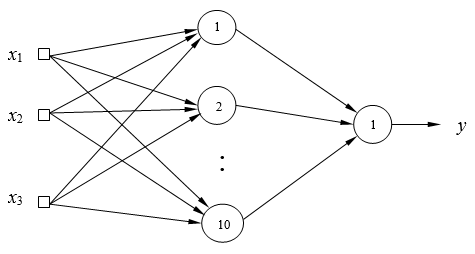


*Fonte*:  SILVA, I.N. – Sistemas Inteligentes – Notas de Aula da disciplina **Redes Neurais Artificiais** – USP São Carlos, 2012

### Utilizando o algoritmo de aprendizagem backpropagation (Regra Delta Generalizada) e os dados de treinamento apresentados no Anexo, sendo que as variáveis de entrada {x1 , x2 , x3} já estão todas normalizadas, realize as seguintes atividades:

## MLP - inicio

# 3.1 - Configuração dos hiperparâmetros

In [11]:
#CÉLULA MLP-MAIN-01
#IMPLEMENTE O CÓDIGO AQUI - INICIO
#Parâmetros
eta = 0.001
epsilon = 0.000001
nInputs  = 3
nOutputs = 1
max_epochs = 2000
dictLayers = {'nLayers':2, 'vLayers':np.array([nInputs, 10, nOutputs])}

# 3.2 - Carga dos dados e execução do treinamento

In [12]:
#CÉLULA MLP-MAIN-02

#IMPLEMENTE O CÓDIGO AQUI - INICIO
# 1 - FAÇA O CARREGAMENTO DOS DADOS
# 2 - SEPARE EM DOIS VETORES DE DADOS: ENTRADAS E SAIDAS
# 3 - EXECUTE O TREINAMENTO E VERIFIQUE A CONVERGÊNCIA

#Carrega dados - Treino
dfTrainingFile = loadDataFile('ds_resonance_training.csv')
# dfTrainingFile.drop(columns=('Amostra'), inplace=True)

nSamples = len (dfTrainingFile['x1'])

vInputsTrain  = np.array(dfTrainingFile[['x1', 'x2', 'x3']])
vOutputsTrain = np.array(dfTrainingFile['d'].values.reshape(nSamples, 1))
# print(vOutputs.shape)

(W_1, W_2, B_1, B_2, MSE) = mlp_train_batch(eta, epsilon, vInputsTrain.T, vOutputsTrain.T, dictLayers, max_epochs)
# (W_1, W_2, B_1, B_2, MSE) = mlp_train_online(eta, epsilon, vInputs.T, vOutputs.T, dictLayers, max_epochs)

# (vWeights, nEpochs) = perceptron_train(eta, vInputs.T, vOutputs, max_epochs)
print(W_1)
print('-----')
print(W_2)

Epoch = 0 - MSE = 0.45033424687550844
Epoch = 1 - MSE = 0.03279038603686616
Epoch = 2 - MSE = 0.010113183103647328
Epoch = 3 - MSE = 0.008836271795996475
Epoch = 4 - MSE = 0.00875615256360507
Epoch = 5 - MSE = 0.00874259246154022
Epoch = 6 - MSE = 0.008732746089330968
Epoch = 7 - MSE = 0.008723107651346613
Epoch = 8 - MSE = 0.008713483063157591
Epoch = 9 - MSE = 0.008703861221375992
Epoch = 10 - MSE = 0.00869424155384898
Epoch = 11 - MSE = 0.008684623994921552
Epoch = 12 - MSE = 0.00867500852624968
Epoch = 13 - MSE = 0.008665395127837067
Epoch = 14 - MSE = 0.008655783780824908
Epoch = 15 - MSE = 0.008646174466345274
Epoch = 16 - MSE = 0.008636567165763895
Epoch = 17 - MSE = 0.008626961860620843
Epoch = 18 - MSE = 0.008617358532643908
Epoch = 19 - MSE = 0.00860775716374493
Epoch = 20 - MSE = 0.008598157736020115
Epoch = 21 - MSE = 0.008588560231749478
Epoch = 22 - MSE = 0.008578964633396408
Epoch = 23 - MSE = 0.008569370923607308
Epoch = 24 - MSE = 0.00855977908521114
Epoch = 25 - MSE =

Epoch = 439 - MSE = 0.004725825561005915
Epoch = 440 - MSE = 0.0047172712618853575
Epoch = 441 - MSE = 0.004708723086984047
Epoch = 442 - MSE = 0.004700181061300376
Epoch = 443 - MSE = 0.00469164520982962
Epoch = 444 - MSE = 0.004683115557563316
Epoch = 445 - MSE = 0.0046745921294886784
Epoch = 446 - MSE = 0.004666074950588004
Epoch = 447 - MSE = 0.004657564045838063
Epoch = 448 - MSE = 0.004649059440209512
Epoch = 449 - MSE = 0.004640561158666291
Epoch = 450 - MSE = 0.00463206922616503
Epoch = 451 - MSE = 0.00462358366765445
Epoch = 452 - MSE = 0.004615104508074765
Epoch = 453 - MSE = 0.0046066317723570975
Epoch = 454 - MSE = 0.00459816548542287
Epoch = 455 - MSE = 0.004589705672183212
Epoch = 456 - MSE = 0.0045812523575383774
Epoch = 457 - MSE = 0.004572805566377134
Epoch = 458 - MSE = 0.0045643653235761875
Epoch = 459 - MSE = 0.004555931653999563
Epoch = 460 - MSE = 0.004547504582498045
Epoch = 461 - MSE = 0.004539084133908555
Epoch = 462 - MSE = 0.004530670333053581
Epoch = 463 - M

Epoch = 849 - MSE = 0.0019644508175596397
Epoch = 850 - MSE = 0.0019598950117607275
Epoch = 851 - MSE = 0.001955350188378009
Epoch = 852 - MSE = 0.0019508163401088462
Epoch = 853 - MSE = 0.001946293459565749
Epoch = 854 - MSE = 0.0019417815392766677
Epoch = 855 - MSE = 0.001937280571685309
Epoch = 856 - MSE = 0.0019327905491514296
Epoch = 857 - MSE = 0.001928311463951149
Epoch = 858 - MSE = 0.0019238433082772572
Epoch = 859 - MSE = 0.0019193860742395233
Epoch = 860 - MSE = 0.0019149397538650045
Epoch = 861 - MSE = 0.0019105043390983598
Epoch = 862 - MSE = 0.0019060798218021651
Epoch = 863 - MSE = 0.001901666193757227
Epoch = 864 - MSE = 0.0018972634466628952
Epoch = 865 - MSE = 0.0018928715721373867
Epoch = 866 - MSE = 0.0018884905617180974
Epoch = 867 - MSE = 0.0018841204068619278
Epoch = 868 - MSE = 0.0018797610989456036
Epoch = 869 - MSE = 0.0018754126292659956
Epoch = 870 - MSE = 0.0018710749890404452
Epoch = 871 - MSE = 0.0018667481694070879
Epoch = 872 - MSE = 0.00186243216142518

Epoch = 1195 - MSE = 0.0009576974688574755
Epoch = 1196 - MSE = 0.000956128189024931
Epoch = 1197 - MSE = 0.0009545646622863349
Epoch = 1198 - MSE = 0.0009530068720794818
Epoch = 1199 - MSE = 0.000951454801862483
Epoch = 1200 - MSE = 0.0009499084351139186
Epoch = 1201 - MSE = 0.0009483677553329844
Epoch = 1202 - MSE = 0.0009468327460396386
Epoch = 1203 - MSE = 0.0009453033907747408
Epoch = 1204 - MSE = 0.0009437796731002004
Epoch = 1205 - MSE = 0.000942261576599119
Epoch = 1206 - MSE = 0.0009407490848759258
Epoch = 1207 - MSE = 0.0009392421815565216
Epoch = 1208 - MSE = 0.0009377408502884188
Epoch = 1209 - MSE = 0.0009362450747408721
Epoch = 1210 - MSE = 0.0009347548386050208
Epoch = 1211 - MSE = 0.0009332701255940218
Epoch = 1212 - MSE = 0.0009317909194431826
Epoch = 1213 - MSE = 0.0009303172039100957
Epoch = 1214 - MSE = 0.000928848962774766
Epoch = 1215 - MSE = 0.0009273861798397487
Epoch = 1216 - MSE = 0.0009259288389302686
Epoch = 1217 - MSE = 0.0009244769238943586
Epoch = 1218 - 

# 3.3 - Verificação dos resultados do treinamento

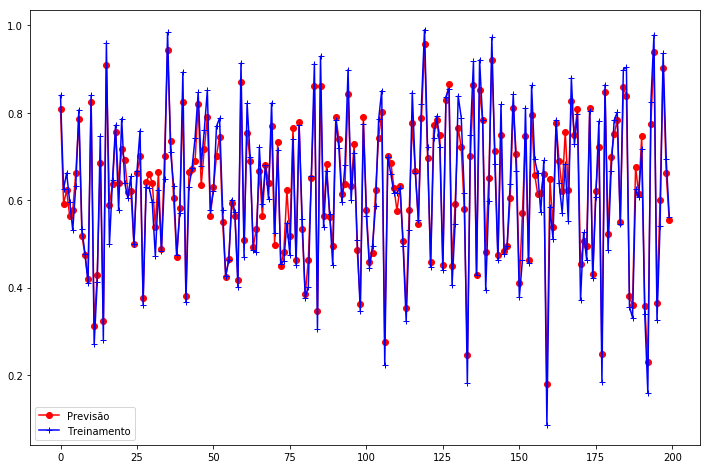

In [15]:
#Verifica resultados 
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# EXECUTE A OPERAÇÃO COM OS DADOS DE TREINAMENTO E VERIFIQUE O RESULTADO 
#PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS

#Executa MLP
y_pred = mlp_operation(vInputsTrain.T, [W_1, W_2], [B_1, B_2])

#Plota os gráficos da resposta de predição VERSUS os dados de treinamento
plt.figure(figsize=(12,8))

#Dados de predição
y_pred = y_pred.T
plt.plot(range(len(y_pred)), y_pred, 'ro-')

#Dados reais
plt.plot(range(len(vOutputsTrain)), vOutputsTrain, 'b+-')
#Legenda
plt.gca().legend(('Previsão', 'Treinamento'))

# 3.3 - Carga dos dados e execução da verificação

[[0.50761018 0.60437497 0.5512775  0.69109767 0.32030321 0.73323561
  0.56874713 0.66951307 0.54508057 0.5988564  0.68236215 0.66361791
  0.3340198  0.77252866 0.48849995 0.80333386 0.76960749 0.60607667
  0.78244968 0.51324428]]
---
[[0.4831 0.5965 0.5318 0.6843 0.2872 0.7663 0.5666 0.6601 0.5427 0.5836
  0.695  0.679  0.2956 0.7742 0.4662 0.8093 0.7581 0.5826 0.7938 0.5012]]


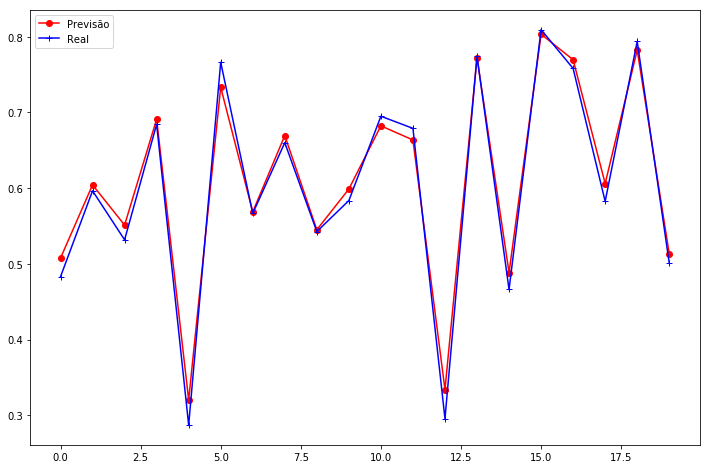

In [16]:
#Carrega dados - Teste
#IMPLEMENTE O CÓDIGO AQUI - INICIO
# 1 - FAÇA O CARREGAMENTO DOS DADOS DE TESTE
# 2 - SEPARE EM DOIS VETORES DE DADOS: ENTRADAS E SAIDAS
# 3 - EXECUTE A OPERAÇÃO E VERIFIQUE O RESULTADO PLOTANDO UM GRÁFICO ENTRE OS DADOS DE PREDIÇÃO VERSUS OS DADOS ESPERADOS

dfTestFile = loadDataFile('ds_resonance_operation.csv')
nSamples = len (dfTestFile['x1'])

vInputsTest  = np.array(dfTestFile[['x1', 'x2', 'x3']])
vOutputsTest = np.array(dfTestFile['d'].values.reshape(nSamples, 1))

#Executa MLP
y_pred = mlp_operation(vInputsTest.T, [W_1, W_2], [B_1, B_2])

print(y_pred)
print('---')
print(vOutputsTest.T)


#Plota os gráficos da resposta de predição VERSUS os dados de teste
plt.figure(figsize=(12,8))

#Dados de predição
y_pred = y_pred.T
plt.plot(range(len(y_pred)), y_pred, 'ro-')

#Dados reais
plt.plot(range(len(vOutputsTest)), vOutputsTest, 'b+-')
#Legenda
plt.gca().legend(('Previsão', 'Real'))

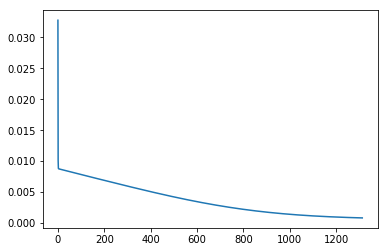

In [17]:
#Erro Quadratico Medio
plt.figure()
plt.plot(range(len(MSE)-1), MSE[1:])